# Milestone 3: Greenhouse Emissions by Country



# INST737: Introduction to Data Science

by: Marta Alejandra Gonzalez, Robin Godinho, Sai Abhishek Gangineni


In [55]:
import numpy as np
import pandas as pd
import math
import sklearn
import matplotlib.pyplot as plt
import matplotlib.transforms as tr
import plotly.express as px
import scipy.stats as stats
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.feature_selection import (
    f_classif,
    SelectFpr,
    SelectKBest,
    f_regression,
    SelectPercentile,
    SequentialFeatureSelector as SFS,
    SelectFromModel
)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model


%pip install mlxtend --upgrade
import mlxtend

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_excel('/content/drive/MyDrive/INST737 Final Project/Final Dataset.xlsx', sheet_name = 'Features')
print(df.head)

<bound method NDFrame.head of       CountryID      Country  Year  \
0             1  Afghanistan  2000   
1             1  Afghanistan  2001   
2             1  Afghanistan  2002   
3             1  Afghanistan  2003   
4             1  Afghanistan  2004   
...         ...          ...   ...   
2795        175     Zimbabwe  2011   
2796        175     Zimbabwe  2012   
2797        175     Zimbabwe  2013   
2798        175     Zimbabwe  2014   
2799        175     Zimbabwe  2015   

      Fossil fuel energy consumption (% of total)  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   
...                                           ...   
2795                                          NaN   
2796                                          NaN   
2797                                

In [4]:
#dropping null values
df_new = df.dropna(how='any')
#printing the new dataframe
print(df_new)

      CountryID        Country  Year  \
128           9      Australia  2000   
129           9      Australia  2001   
130           9      Australia  2002   
131           9      Australia  2003   
132           9      Australia  2004   
...         ...            ...   ...   
2683        168  United States  2011   
2684        168  United States  2012   
2685        168  United States  2013   
2686        168  United States  2014   
2687        168  United States  2015   

      Fossil fuel energy consumption (% of total)  \
128                                     89.328168   
129                                     98.053088   
130                                     95.890215   
131                                     93.886025   
132                                     94.068213   
...                                           ...   
2683                                    83.714053   
2684                                    83.437178   
2685                                    82

#Support Vector Regression Model

In [5]:
# Find the minimum and maximum values of the target variable
min_value = df_new['GHG Emissions per Capita (tCO2e)'].min()
max_value = df_new['GHG Emissions per Capita (tCO2e)'].max()

# Calculate the range of the target variable
variable_range = max_value - min_value

print("Minimum value:", min_value)
print("Maximum value:", max_value)
print("Range of the target variable:", variable_range)

Minimum value: 3.4089200590209545
Maximum value: 25.969670520554306
Range of the target variable: 22.560750461533353


In [6]:
# Split dataset into features and target variable
X = df_new.drop(columns=['GHG Emission Class', 'CountryID', 'Country', 'Year', 'GHG Emissions per Capita (tCO2e)'], axis=1)  # Features
y = df_new['GHG Emissions per Capita (tCO2e)']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Linear Kernel

# Creating and training the SVR model
svr_model = SVR(kernel='linear')  # Linear Kernel
svr_model.fit(X_train_scaled, y_train)

# Predicting on the testing set
y_pred = svr_model.predict(X_test_scaled)

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 1.902371673586981


In [8]:
# Radial Basis Function Kernel

# Creating and training the SVR model
svr_model2 = SVR(kernel='rbf')  # Radial Basis Function Kernel
svr_model2.fit(X_train_scaled, y_train)

# Predicting on the testing set
y_pred2 = svr_model2.predict(X_test_scaled)

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred2))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 1.347913991794001


In [9]:
# Polynomial Kernel

# Creating and training the SVR model
svr_model3 = SVR(kernel='poly')  # Polynomial Kernel
svr_model3.fit(X_train_scaled, y_train)

# Predicting on the testing set
y_pred3 = svr_model3.predict(X_test_scaled)

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred3))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 2.5454590151983107


In [10]:
# Sigmoid Kernel

# Creating and training the SVR model
svr_model4 = SVR(kernel='sigmoid')  # Sigmoid Kernel
svr_model4.fit(X_train_scaled, y_train)

# Predicting on the testing set
y_pred4 = svr_model4.predict(X_test_scaled)

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred4))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 5.416909140199213


# Neural Networks

In [11]:
# Split dataset into features and target variable
X_nn = df_new.drop(columns=['GHG Emission Class', 'CountryID', 'Country', 'Year', 'GHG Emissions per Capita (tCO2e)'], axis=1)  # Features
y_nn = df_new['GHG Emissions per Capita (tCO2e)']  # Target variable

# Splitting the dataset into training and testing sets
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size=0.2, random_state=42)


# Feature scaling
scaler = MinMaxScaler()

# Fit scaler to training data and transform both training and testing data
X_train_nn_scaled = scaler.fit_transform(X_train_nn)
X_test_nn_scaled = scaler.transform(X_test_nn)

In [12]:
# Define configurations for different cases
configurations = [
    {'hidden_layers': [32]},  # Case 1
    {'hidden_layers': [64]},  # Case 2
    {'hidden_layers': [32, 16]},  # Case 3
    {'hidden_layers': [64, 32]},  # Case 4
    {'hidden_layers': [128, 64, 32]},  # Case 5
]

# Define activation functions
activation_functions = ['relu', 'sigmoid', 'tanh', 'selu', 'gelu']

rmse_tracker = {}
corr_tracker = {}

# Train and evaluate models for each configuration
count = 0
for i, config in enumerate(configurations):
  for activation_func in activation_functions:
      print(f'Case {count+1}:')
      model = Sequential()
      model.add(Dense(config['hidden_layers'][0], activation=activation_func, input_shape=(X_train_nn.shape[1],)))
      for units in config['hidden_layers'][1:]:
          model.add(Dense(units, activation=activation_func))
      model.add(Dense(1))  # Output layer

      model.compile(optimizer='adam', loss='mean_squared_error')

      model.fit(X_train_nn_scaled, y_train_nn, epochs=10, batch_size=32, verbose=0)

      y_pred_nn = model.predict(X_test_nn_scaled)
      rmse = mean_squared_error(y_test_nn, y_pred_nn, squared=False)
      rmse_tracker[f'Case {i+1}'] = rmse
      print(f'Root Mean Squared Error: {rmse}')

      correlation = np.corrcoef(np.array(y_pred_nn).flatten(), np.array(y_test_nn).flatten())[0, 1]
      corr_tracker[f'Case {i+1}'] = correlation

      # Print the correlation coefficient
      print("Correlation between y_pred and y_test:", correlation)

      # Iterate through each layer in the model
      for layer in model.layers:
        # Check if the layer has an activation function
        if hasattr(layer, 'activation'):
          # Retrieve the activation function name
          activation_function = layer.activation.__name__
          print("Layer Activation Function:", activation_function)

      # Plot the model
      plot_model(model, to_file=f'Case {count+1}.png', show_shapes=True, show_layer_names=True)

      count += 1

Case 1:
3/3 [==============================] - 0s 5ms/step
Root Mean Squared Error: 5.33792159195907
Correlation between y_pred and y_test: 0.5817241572936586
Layer Activation Function: relu
Layer Activation Function: linear
Case 2:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3/3 [==============================] - 0s 5ms/step
Root Mean Squared Error: 5.501840539563797
Correlation between y_pred and y_test: 0.4532144722012011
Layer Activation Function: sigmoid
Layer Activation Function: linear
Case 3:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3/3 [==============================] - 0s 7ms/step
Root Mean Squared Error: 5.295997818991199
Correlation between y_pred and y_test: 0.6597125818467925
Layer Activation Function: tanh
Layer Activation Function: linear
Case 4:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3/3 [==============================] - 0s 5ms/step
Root Mean Squared Error: 4.745405644825611
Correlation between y_pred and y_test: 0.5524958790500709
Layer Activation Function: selu
Layer Activation Function: linear
Case 5:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3/3 [==============================] - 0s 8ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Root Mean Squared Error: 5.663016651522243
Correlation between y_pred and y_test: 0.6194819666810425
Layer Activation Function: gelu
Layer Activation Function: linear
Case 6:


3/3 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Root Mean Squared Error: 4.370362774580631
Correlation between y_pred and y_test: 0.5389391873240185
Layer Activation Function: relu
Layer Activation Function: linear
Case 7:
3/3 [==============================] - 0s 4ms/step
Root Mean Squared Error: 6.0392056689888
Correlation between y_pred and y_test: 0.5444754453412677
Layer Activation Function: sigmoid
Layer Activation Function: linear
Case 8:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3/3 [==============================] - 0s 4ms/step
Root Mean Squared Error: 4.462501163703687
Correlation between y_pred and y_test: 0.5637091294639762
Layer Activation Function: tanh
Layer Activation Function: linear
Case 9:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3/3 [==============================] - 0s 4ms/step
Root Mean Squared Error: 4.2337598046517115
Correlation between y_pred and y_test: 0.6716434081826639
Layer Activation Function: selu
Layer Activation Function: linear
Case 10:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3/3 [==============================] - 0s 4ms/step
Root Mean Squared Error: 4.1885017170094105
Correlation between y_pred and y_test: 0.660967194752884
Layer Activation Function: gelu
Layer Activation Function: linear
Case 11:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3/3 [==============================] - 0s 3ms/step
Root Mean Squared Error: 4.078466901871914
Correlation between y_pred and y_test: 0.7040446675220395
Layer Activation Function: relu
Layer Activation Function: relu
Layer Activation Function: linear
Case 12:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3/3 [==============================] - 0s 5ms/step
Root Mean Squared Error: 8.99033074745252
Correlation between y_pred and y_test: 0.6232066685912151
Layer Activation Function: sigmoid
Layer Activation Function: sigmoid
Layer Activation Function: linear
Case 13:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3/3 [==============================] - 0s 7ms/step
Root Mean Squared Error: 5.818935756210737
Correlation between y_pred and y_test: 0.4469327397054953
Layer Activation Function: tanh
Layer Activation Function: tanh
Layer Activation Function: linear
Case 14:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3/3 [==============================] - 0s 4ms/step
Root Mean Squared Error: 4.52103958413139
Correlation between y_pred and y_test: 0.4085674817471893
Layer Activation Function: selu
Layer Activation Function: selu
Layer Activation Function: linear
Case 15:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3/3 [==============================] - 0s 4ms/step
Root Mean Squared Error: 4.3504554414561545
Correlation between y_pred and y_test: 0.549007008837862
Layer Activation Function: gelu
Layer Activation Function: gelu
Layer Activation Function: linear
Case 16:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3/3 [==============================] - 0s 4ms/step
Root Mean Squared Error: 4.178915500384767
Correlation between y_pred and y_test: 0.6968574559866002
Layer Activation Function: relu
Layer Activation Function: relu
Layer Activation Function: linear
Case 17:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3/3 [==============================] - 0s 4ms/step
Root Mean Squared Error: 6.550909750772696
Correlation between y_pred and y_test: 0.4913348132820291
Layer Activation Function: sigmoid
Layer Activation Function: sigmoid
Layer Activation Function: linear
Case 18:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3/3 [==============================] - 0s 4ms/step
Root Mean Squared Error: 4.681179560042332
Correlation between y_pred and y_test: 0.5000540134385006
Layer Activation Function: tanh
Layer Activation Function: tanh
Layer Activation Function: linear
Case 19:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3/3 [==============================] - 0s 4ms/step
Root Mean Squared Error: 4.181135168878691
Correlation between y_pred and y_test: 0.7132546913966034
Layer Activation Function: selu
Layer Activation Function: selu
Layer Activation Function: linear
Case 20:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3/3 [==============================] - 0s 5ms/step
Root Mean Squared Error: 4.076888035922848
Correlation between y_pred and y_test: 0.6898384638726088
Layer Activation Function: gelu
Layer Activation Function: gelu
Layer Activation Function: linear
Case 21:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3/3 [==============================] - 0s 4ms/step
Root Mean Squared Error: 3.828749029464743
Correlation between y_pred and y_test: 0.77641354713392
Layer Activation Function: relu
Layer Activation Function: relu
Layer Activation Function: relu
Layer Activation Function: linear
Case 22:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3/3 [==============================] - 0s 6ms/step
Root Mean Squared Error: 7.084569811292173
Correlation between y_pred and y_test: 0.5955692535569437
Layer Activation Function: sigmoid
Layer Activation Function: sigmoid
Layer Activation Function: sigmoid
Layer Activation Function: linear
Case 23:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3/3 [==============================] - 0s 4ms/step
Root Mean Squared Error: 4.80774737397225
Correlation between y_pred and y_test: 0.42881962073917057
Layer Activation Function: tanh
Layer Activation Function: tanh
Layer Activation Function: tanh
Layer Activation Function: linear
Case 24:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3/3 [==============================] - 0s 4ms/step
Root Mean Squared Error: 3.5485829034132728
Correlation between y_pred and y_test: 0.8523587672844686
Layer Activation Function: selu
Layer Activation Function: selu
Layer Activation Function: selu
Layer Activation Function: linear
Case 25:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3/3 [==============================] - 0s 4ms/step
Root Mean Squared Error: 3.4814290853455216
Correlation between y_pred and y_test: 0.8237943313847162
Layer Activation Function: gelu
Layer Activation Function: gelu
Layer Activation Function: gelu
Layer Activation Function: linear


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


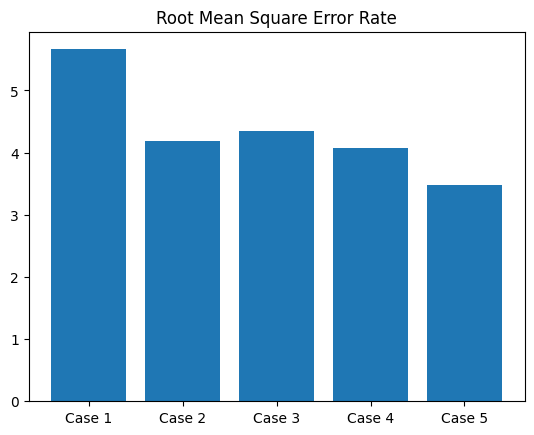

In [13]:
import matplotlib.pyplot as plt

rmse_names = list(rmse_tracker.keys())
rmse_values = list(rmse_tracker.values())

plt.bar(range(len(rmse_tracker)), rmse_values, tick_label=rmse_names)
plt.title("Root Mean Square Error Rate")
plt.show()

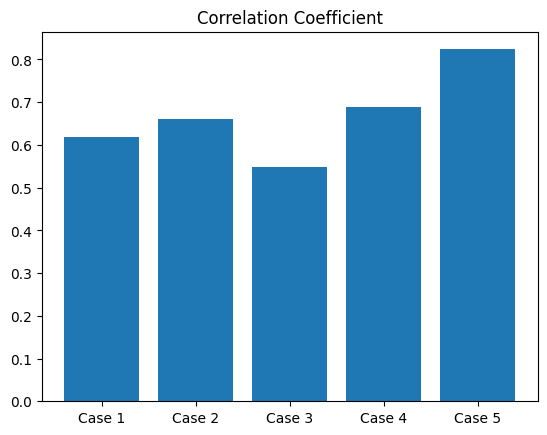

In [14]:
corr_names = list(corr_tracker.keys())
corr_values = list(corr_tracker.values())

plt.bar(range(len(corr_tracker)), corr_values, tick_label=corr_names)
plt.title("Correlation Coefficient")
plt.show()

#K-Means Clustering Algorithm

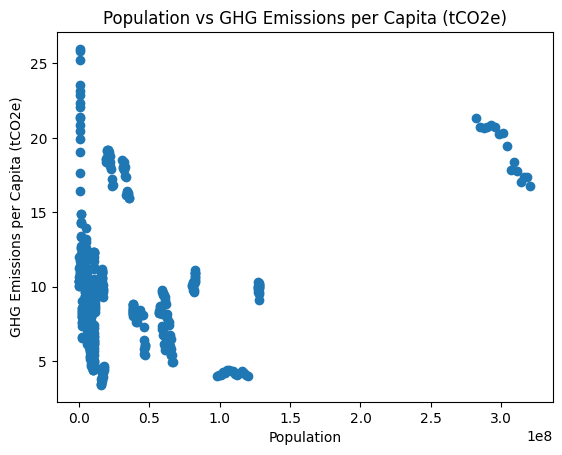

In [15]:
import matplotlib.pyplot as plt

plt.scatter(df_new['Population, total'],df_new['GHG Emissions per Capita (tCO2e)'])
plt.xlabel('Population')
plt.ylabel('GHG Emissions per Capita (tCO2e)')
plt.title('Population vs GHG Emissions per Capita (tCO2e)')
plt.show()


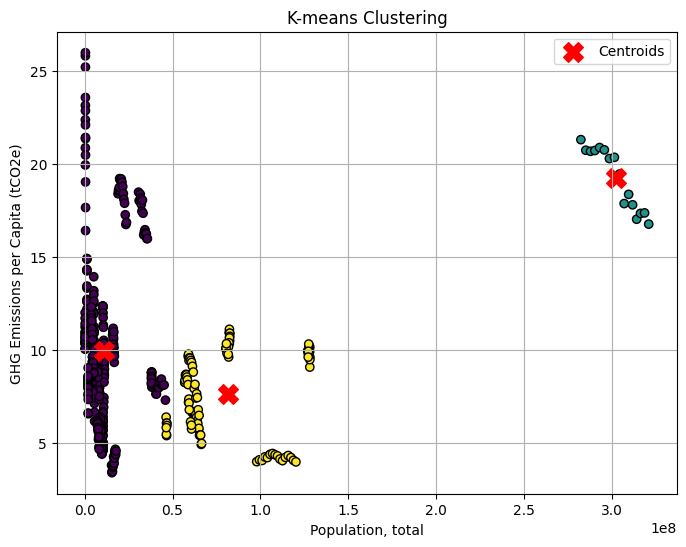

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Sample data
X = df_new[['Population, total', 'GHG Emissions per Capita (tCO2e)']]

# Initialize KMeans with the number of clusters (k)
kmeans = KMeans(n_clusters=3, random_state=42)  # Replace 3 with the desired number of clusters

# Fit KMeans to the data
kmeans.fit(X)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Get the cluster labels for each data point
labels = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X['Population, total'], X['GHG Emissions per Capita (tCO2e)'], c=labels, cmap='viridis', marker='o', edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label='Centroids')
plt.xlabel('Population, total')
plt.ylabel('GHG Emissions per Capita (tCO2e)')
plt.title('K-means Clustering')
plt.legend()
plt.grid(True)
plt.show()

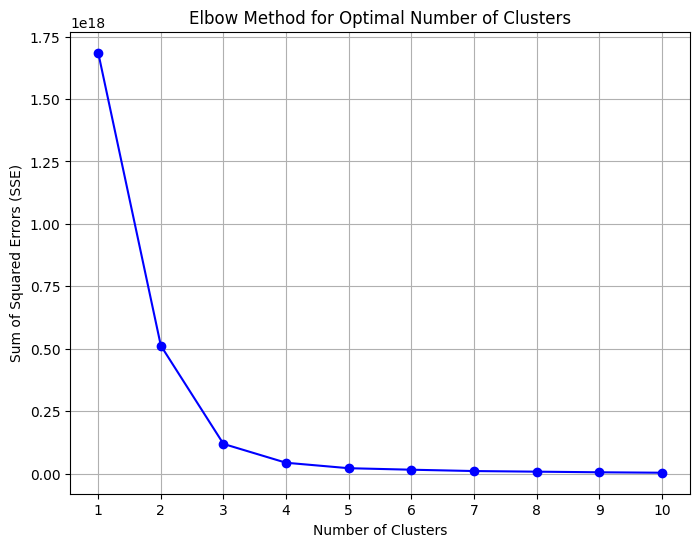

In [17]:
# Plotting the Elbow method to find the correct number for K
sse = []  # List to store SSE values for different numbers of clusters

# Try different numbers of clusters from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  # SSE is stored in inertia_ attribute

# Plot the SSE for different numbers of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

#Hierarchical Cluster

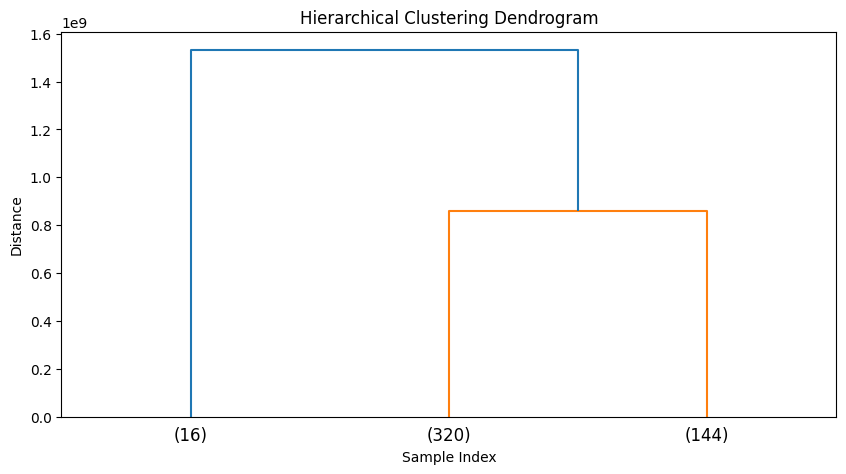

In [18]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Sample data
X = df_new[['Population, total', 'GHG Emissions per Capita (tCO2e)']]

# Perform hierarchical clustering
Z = linkage(X, method='ward')  # You can choose different linkage methods, such as 'single', 'complete', or 'average'

# Plot the dendrogram with a specific number of dendrograms
plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode='lastp', p=3)  # Display the last 3 dendrograms
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

#Density-based Cluster

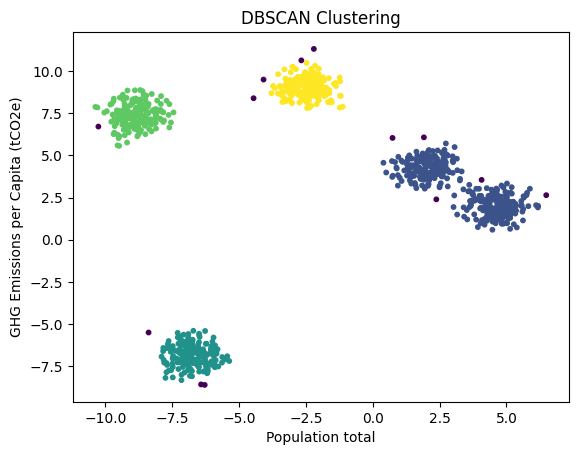

In [19]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
X, _ = make_blobs(n_samples=1000, centers=5, cluster_std=0.6, random_state=42)

# Instantiate DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model and predict clusters
clusters = dbscan.fit_predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o', s=10)
plt.title('DBSCAN Clustering')
plt.xlabel('Population total')
plt.ylabel('GHG Emissions per Capita (tCO2e)')
plt.show()


# Comparative Analysis

In [20]:
# Install the pycaret package
!pip install pycaret

# Importing all of the functions
from pycaret.classification import *

In [21]:
data = df_new

s = setup(data, target='GHG Emission Class', session_id =28)

best_model = compare_models()

,Description,Value
0,Session id,28
1,Target,GHG Emission Class
2,Target type,Binary
3,Target mapping,"High (>6 tCO2e): 0, Mid (1.5-6 tCO2e): 1"
4,Original data shape,"(480, 20)"
5,Transformed data shape,"(480, 20)"
6,Transformed train set shape,"(336, 20)"
7,Transformed test set shape,"(144, 20)"
8,Numeric features,18
9,Categorical features,1


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2060
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6820
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1090
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1700
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6760
et,Extra Trees Classifier,0.9971,0.9995,0.9971,0.9972,0.9970,0.9905,0.9909,0.2410
xgboost,Extreme Gradient Boosting,0.9939,0.9963,0.9939,0.9955,0.9943,0.9820,0.9833,0.1880
ridge,Ridge Classifier,0.9286,0.9915,0.9286,0.9345,0.9209,0.7262,0.7548,0.1580
lda,Linear Discriminant Analysis,0.9281,0.9886,0.9281,0.9386,0.9293,0.7725,0.7840,0.0770
lr,Logistic Regression,0.9019,0.9341,0.9019,0.9052,0.8970,0.6531,0.6712,1.5110


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

# Cross-validation Techniques

In [22]:
# Load dataset
data = df_new

# Initialize setup
setup(data, target='GHG Emission Class')

# Compare models with different cross-validation techniques
compare_models(fold=5)  # 5-fold cross-validation
compare_models(fold=10)  # 10-fold cross-validation

,Description,Value
0,Session id,7134
1,Target,GHG Emission Class
2,Target type,Binary
3,Target mapping,"High (>6 tCO2e): 0, Mid (1.5-6 tCO2e): 1"
4,Original data shape,"(480, 20)"
5,Transformed data shape,"(480, 20)"
6,Transformed train set shape,"(336, 20)"
7,Transformed test set shape,"(144, 20)"
8,Numeric features,18
9,Categorical features,1


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1560
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1840
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3380
rf,Random Forest Classifier,0.9970,1.0000,0.9970,0.9972,0.9971,0.9902,0.9904,0.5220
xgboost,Extreme Gradient Boosting,0.9970,0.9981,0.9970,0.9972,0.9971,0.9907,0.9909,0.3600
lightgbm,Light Gradient Boosting Machine,0.9970,1.0000,0.9970,0.9972,0.9971,0.9902,0.9904,0.9680
et,Extra Trees Classifier,0.9881,0.9975,0.9881,0.9884,0.9881,0.9606,0.9611,0.4600
ridge,Ridge Classifier,0.9405,0.9890,0.9405,0.9430,0.9364,0.7793,0.7955,0.1560
lda,Linear Discriminant Analysis,0.9375,0.9851,0.9375,0.9378,0.9367,0.7886,0.7915,0.1600
lr,Logistic Regression,0.9047,0.9435,0.9047,0.9027,0.9021,0.6691,0.6739,0.5940


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1190
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0780
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1740
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2910
rf,Random Forest Classifier,0.9971,1.0000,0.9971,0.9974,0.9971,0.9915,0.9918,0.2430
xgboost,Extreme Gradient Boosting,0.9970,0.9981,0.9970,0.9974,0.9971,0.9904,0.9909,0.1040
et,Extra Trees Classifier,0.9852,0.9981,0.9852,0.9858,0.9851,0.9521,0.9535,0.2960
lda,Linear Discriminant Analysis,0.9438,0.9875,0.9438,0.9463,0.9433,0.8122,0.8175,0.1280
ridge,Ridge Classifier,0.9317,0.9909,0.9317,0.9350,0.9269,0.7448,0.7642,0.0760
lr,Logistic Regression,0.8960,0.9421,0.8960,0.8960,0.8911,0.6313,0.6456,0.2410


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=7134, splitter='best')

In [23]:
from pycaret.classification import *

# Load dataset
data = df_new

# Initialize setup
setup(data, target='GHG Emission Class')

# Get the number of samples in the dataset
num_samples = len(data)

# Compare models with Leave-One-Out cross-validation
compare_models(fold=num_samples)

,Description,Value
0,Session id,1087
1,Target,GHG Emission Class
2,Target type,Binary
3,Target mapping,"High (>6 tCO2e): 0, Mid (1.5-6 tCO2e): 1"
4,Original data shape,"(480, 20)"
5,Transformed data shape,"(480, 20)"
6,Transformed train set shape,"(336, 20)"
7,Transformed test set shape,"(144, 20)"
8,Numeric features,18
9,Categorical features,1


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

[]

# Feature Selection

**LOGISTIC REGRESSION - EMBEDDED METHOD**

In [24]:
df['Binary Class'] = [0 if x < 3.5 else 1 for x in df['GHG Emissions per Capita (tCO2e)']]
df.head(50)

,CountryID,Country,Year,Fossil fuel energy consumption (% of total),"GDP per capita, PPP (current international $)",Agricultural land (% of land area),Forest area (% of land area),Urban population (% of total population),Access to Clean Fuels and Technologies for cooking (% of total population),Access to electricity (% of rural population with access),...,Access to electricity (% of urban population with access),Energy intensity level of primary energy (MJ/PPP),Renewable electricity share of total electricity output (%),Renewable energy share of TFEC (%),"Population, total",Total electricity output per capita (kWh),Total final energy consumption per Capita (TFEC) (MJ),GHG Emissions per Capita (tCO2e),GHG Emission Class,Binary Class
0,1,Afghanistan,2000,NaN,NaN,57.945817,1.852782,22.078,8.80,NaN,...,69.640984,1.686173,74.989094,54.243126,19542982,35.189103,1066.096009,0.053728,Low (0-1.5 tCO2e),0
1,1,Afghanistan,2001,NaN,NaN,57.947350,1.852782,22.169,9.51,NaN,...,71.371780,1.827399,72.811460,54.055055,19688632,35.101474,1081.518700,0.054346,Low (0-1.5 tCO2e),0
2,1,Afghanistan,2002,NaN,NaN,57.939684,1.852782,22.261,10.39,NaN,...,73.099968,1.360283,79.063971,43.771149,21000256,34.390057,1305.159976,0.063809,Low (0-1.5 tCO2e),0
3,1,Afghanistan,2003,NaN,NaN,58.083805,1.852782,22.353,11.46,NaN,...,74.828354,1.325028,70.249729,42.276141,22645130,43.099775,1319.801230,0.068889,Low (0-1.5 tCO2e),0
4,1,Afghanistan,2004,NaN,NaN,58.151266,1.852782,22.500,12.43,NaN,...,76.559761,1.143996,70.890841,49.843148,23553551,33.116026,1096.244040,0.052646,Low (0-1.5 tCO2e),0
5,1,Afghanistan,2005,NaN,NaN,58.134400,1.852782,22.703,13.49,NaN,...,74.000000,1.267647,74.061810,40.859171,24411191,37.114125,1327.995858,0.077424,Low (0-1.5 tCO2e),0
6,1,Afghanistan,2006,NaN,NaN,58.123668,1.852782,22.907,14.81,NaN,...,80.042892,1.408623,70.755750,37.137249,25442944,35.884212,1515.997318,0.084896,Low (0-1.5 tCO2e),0
7,1,Afghanistan,2007,NaN,NaN,58.129801,1.852782,23.113,15.99,NaN,...,81.800255,1.460938,72.000000,33.862579,25903301,36.674862,1740.917200,0.108094,Low (0-1.5 tCO2e),0
8,1,Afghanistan,2008,NaN,NaN,58.132867,1.852782,23.320,17.44,NaN,...,89.900000,2.147590,68.654822,21.343708,26427199,29.817765,2714.782375,0.160819,Low (0-1.5 tCO2e),0
9,1,Afghanistan,2009,NaN,NaN,58.132867,1.852782,23.528,18.84,NaN,...,85.354507,2.617060,87.176603,17.813855,27385307,32.462663,3454.875204,0.233337,Low (0-1.5 tCO2e),0


In [25]:
df_new = df.dropna(how='any')
print(df_new)

      CountryID        Country  Year  \
128           9      Australia  2000   
129           9      Australia  2001   
130           9      Australia  2002   
131           9      Australia  2003   
132           9      Australia  2004   
...         ...            ...   ...   
2683        168  United States  2011   
2684        168  United States  2012   
2685        168  United States  2013   
2686        168  United States  2014   
2687        168  United States  2015   

      Fossil fuel energy consumption (% of total)  \
128                                     89.328168   
129                                     98.053088   
130                                     95.890215   
131                                     93.886025   
132                                     94.068213   
...                                           ...   
2683                                    83.714053   
2684                                    83.437178   
2685                                    82

In [26]:
# Split dataset into features and target variable
X = df_new.drop(columns=['Binary Class', 'GHG Emission Class', 'CountryID', 'Country', 'Year', 'GHG Emissions per Capita (tCO2e)'], axis=1)  # Features
y = df_new['Binary Class']  # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [29]:
skf = StratifiedKFold(n_splits=10)
lasso = LassoCV(cv=skf, random_state=42).fit(X_train, y_train)
features_selected = list(df_new.columns[np.where(lasso.coef_!=0)[0]])
print('Selected Features:', features_selected)

Selected Features: ['Energy intensity level of primary energy (MJ/PPP)', 'Renewable energy share of TFEC (%)']


In [30]:
lr = LogisticRegression(C=10, class_weight='balanced', max_iter=10000, random_state=42)
preds = cross_val_predict(lr, X_train[features_selected], y_train, cv=skf)
print(classification_report(y_train, preds))

              precision    recall  f1-score   support

           0       0.03      1.00      0.05         2
           1       1.00      0.79      0.88       334

    accuracy                           0.79       336
   macro avg       0.51      0.89      0.47       336
weighted avg       0.99      0.79      0.88       336



In [31]:
# Split dataset into features and target variable
feature_cols_log = ['Energy intensity level of primary energy (MJ/PPP)', 'Renewable energy share of TFEC (%)']
X_new = df_new[feature_cols_log] # Features
y_new = df_new['Binary Class']  # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=0)

# Fit logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Get intercept and coefficients of the logistic regression model
intercept = logreg.intercept_[0]
coefficients = logreg.coef_[0]

print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: 5.171481581576751
Coefficients: [ 0.24916479 -0.05102423]


In [32]:
# Define unit increase for independent variable
unit_increase = 1

# Calculate log-odds for unit increase in independent variable
log_odds = coefficients * unit_increase

# Calculate odds ratios for unit increase in independent variable
odds_ratios = np.exp(log_odds)

# Print log-odds and odds ratios
for i, feature_name in enumerate(X_train.columns):
    print(f"Independent Variable: {feature_name}")
    print(f"Log-Odds for a Unit Increase: {log_odds[i]}")
    print(f"Odds Ratio for a Unit Increase: {odds_ratios[i]}")

Independent Variable: Energy intensity level of primary energy (MJ/PPP)
Log-Odds for a Unit Increase: 0.24916479322057225
Odds Ratio for a Unit Increase: 1.2829534376791492
Independent Variable: Renewable energy share of TFEC (%)
Log-Odds for a Unit Increase: -0.05102422729927771
Odds Ratio for a Unit Increase: 0.9502556481255652


In [33]:
# Get absolute coefficients
absolute_coefficients = np.abs(coefficients)

# Sort the absolute coefficients and corresponding feature names
sorted_indices = np.argsort(absolute_coefficients)[::-1]
sorted_features = X_train.columns[sorted_indices]
sorted_coefficients = absolute_coefficients[sorted_indices]

# Print the most predictive features
print("Most Predictive Features:")
for feature, coef in zip(sorted_features, sorted_coefficients):
    print(f"{feature}: {coef}")

Most Predictive Features:
Energy intensity level of primary energy (MJ/PPP): 0.24916479322057225
Renewable energy share of TFEC (%): 0.05102422729927771


In [34]:
# Use the trained logistic regression model to make predictions on the testing dataset
y_pred = logreg.predict(X_test)

# Print the predicted labels
print("Predicted labels:", y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Predicted labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy: 0.99


**RANDOM FOREST - WRAPPER METHOD**

In [35]:
#Read data from the "Features" sheet
#Read the specific columns into the DataFrame
col_names =  ['Population, total', 'Agricultural land (% of land area)', 'Total electricity output per capita (kWh)', 'Total final energy consumption per Capita (TFEC) (MJ)', 'GHG Emissions per Capita (tCO2e)', 'GHG Emission Class']
df3 = pd.read_excel('/content/drive/MyDrive/INST737 Final Project/Final Dataset.xlsx', sheet_name = 'Features', usecols = col_names)
print(df3.tail(10))

      Agricultural land (% of land area)  Population, total  \
2790                           42.135195           12330490   
2791                           41.876696           12450568   
2792                           42.522942           12550347   
2793                           42.135195           12679810   
2794                           41.876696           12839771   
2795                           42.393693           13025785   
2796                           41.876696           13265331   
2797                           41.876696           13555422   
2798                           41.876696           13855753   
2799                           41.876696           14154937   

      Total electricity output per capita (kWh)  \
2790                                 646.689629   
2791                                 611.136777   
2792                                 607.552923   
2793                                 575.008616   
2794                                 674.856273   


In [36]:
df3.describe()

,Agricultural land (% of land area),"Population, total",Total electricity output per capita (kWh),Total final energy consumption per Capita (TFEC) (MJ),GHG Emissions per Capita (tCO2e)
count,2592.000000,2.800000e+03,2576.000000,2608.000000,2800.000000
mean,39.905523,3.644690e+07,3511.743131,51224.460894,4.812985
std,21.584310,1.384211e+08,5521.685286,57010.209942,6.681345
min,0.448718,9.609000e+03,0.000000,0.000000,0.019519
25%,21.712776,1.899871e+06,284.113336,14003.981099,0.593190
50%,41.084986,7.557865e+06,1575.915850,28953.459523,2.357686
75%,57.436346,2.302792e+07,4623.777843,68781.725064,6.610386
max,85.487373,1.379860e+09,56826.322869,365436.142945,67.498391


In [37]:
# Define mapping dictionary
mapping = {'Low (0-1.5 tCO2e)': 0, 'Mid (1.5-6 tCO2e)': 1, 'High (>6 tCO2e)': 2}

# Add a new column with mapped values
df3['Class Value'] = df3['GHG Emission Class'].map(mapping)

print(df3.head)

<bound method NDFrame.head of       Agricultural land (% of land area)  Population, total  \
0                              57.945817           19542982   
1                              57.947350           19688632   
2                              57.939684           21000256   
3                              58.083805           22645130   
4                              58.151266           23553551   
...                                  ...                ...   
2795                           42.393693           13025785   
2796                           41.876696           13265331   
2797                           41.876696           13555422   
2798                           41.876696           13855753   
2799                           41.876696           14154937   

      Total electricity output per capita (kWh)  \
0                                     35.189103   
1                                     35.101474   
2                                     34.390057   
3        

In [38]:
# Replace NaN values with 0
df3.fillna(0, inplace=True)

In [39]:
# X contains the features, y contains the target variable
# Replace 'target_column' with the name of your target column
X = df3.drop(columns=['Class Value', 'GHG Emission Class'])  # Features
y = df3['Class Value']  # Target variable

# 80% of the data will be used for training and 20% for testing

# Split the data into training and testing sets
# test_size specifies the proportion of the dataset to include in the test split
# random_state is used to ensure reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train and y_train are the training features and target
# X_test and y_test are the testing features and target

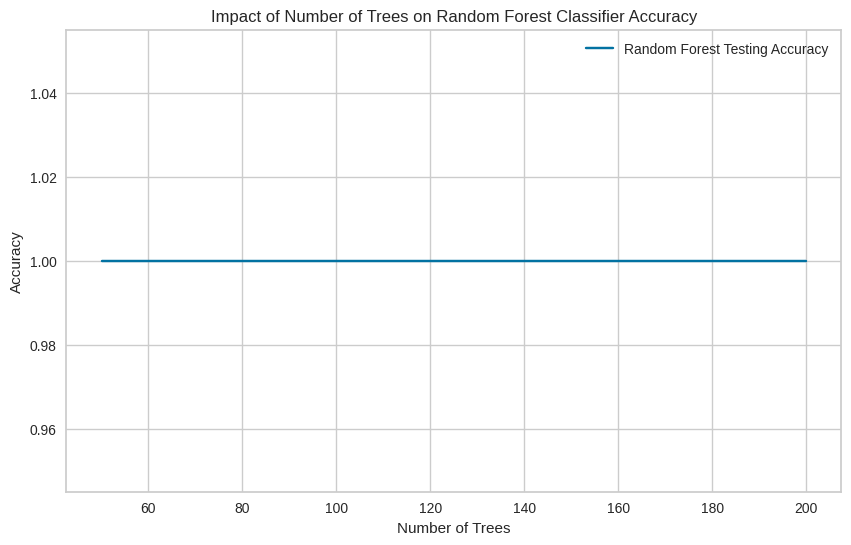

In [40]:
# Initialize lists to store accuracy scores
rf_test_accuracies = []
# Define a list of numbers of trees to try
num_trees_list = [50, 100, 150, 200]

for num_trees in num_trees_list:
    # Initialize Random Forest Classifier with specified number of trees
    rf_clf = RandomForestClassifier(n_estimators=num_trees, random_state=42)

    # Train the Random Forest Classifier
    rf_clf.fit(X_train, y_train)

    # Predictions on testing set
    rf_test_predictions = rf_clf.predict(X_test)

    # Calculate accuracy on testing set
    rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
    rf_test_accuracies.append(rf_test_accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(num_trees_list, rf_test_accuracies, label='Random Forest Testing Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Impact of Number of Trees on Random Forest Classifier Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [41]:
# Train Random Forest Classifier with a selected number of trees
selected_num_trees = 100  # Choose the number of trees
sfs = SFS(
    estimator = RandomForestClassifier(n_estimators=5, random_state=0),
    n_features_to_select='auto',
    tol=0.001,
    direction='forward',
    scoring='roc_auc',
    cv=3,
)
sfs = sfs.fit(X_train, y_train)

In [42]:
sfs.get_feature_names_out()

array(['Agricultural land (% of land area)', 'Population, total',
       'Total electricity output per capita (kWh)',
       'Total final energy consumption per Capita (TFEC) (MJ)'],
      dtype=object)

In [43]:
X_train_t = sfs.transform(X_train)
X_test_t = sfs.transform(X_test)
X_train_t = pd.DataFrame(X_train_t, columns=sfs.get_feature_names_out())
X_test_t = pd.DataFrame(X_test_t, columns=sfs.get_feature_names_out())

In [44]:
# Train Random Forest Classifier with a selected number of trees
selected_num_trees = 100  # Choose the number of trees
rf_clf = RandomForestClassifier(n_estimators=selected_num_trees, random_state=42)

# Train the Random Forest Classifier
rf_clf.fit(X_train_t, y_train)

# Get feature importances
feature_importances = rf_clf.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': X_train_t.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(importance_df.head())

                                             Feature  Importance
3  Total final energy consumption per Capita (TFE...    0.378617
2          Total electricity output per capita (kWh)    0.375643
1                                  Population, total    0.155196
0                 Agricultural land (% of land area)    0.090544


**LINEAR REGRESSION - FILTER METHOD**

In [45]:
df = pd.read_excel('/content/drive/MyDrive/INST737 Final Project/Final Dataset.xlsx', sheet_name = 'Features')
print(df.head)

<bound method NDFrame.head of       CountryID      Country  Year  \
0             1  Afghanistan  2000   
1             1  Afghanistan  2001   
2             1  Afghanistan  2002   
3             1  Afghanistan  2003   
4             1  Afghanistan  2004   
...         ...          ...   ...   
2795        175     Zimbabwe  2011   
2796        175     Zimbabwe  2012   
2797        175     Zimbabwe  2013   
2798        175     Zimbabwe  2014   
2799        175     Zimbabwe  2015   

      Fossil fuel energy consumption (% of total)  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   
...                                           ...   
2795                                          NaN   
2796                                          NaN   
2797                                

The next step was dropping null values from the dataset.

In [46]:
#dropping null values
df_new = df.dropna(how='any')
#printing the new dataframe
print(df_new)

      CountryID        Country  Year  \
128           9      Australia  2000   
129           9      Australia  2001   
130           9      Australia  2002   
131           9      Australia  2003   
132           9      Australia  2004   
...         ...            ...   ...   
2683        168  United States  2011   
2684        168  United States  2012   
2685        168  United States  2013   
2686        168  United States  2014   
2687        168  United States  2015   

      Fossil fuel energy consumption (% of total)  \
128                                     89.328168   
129                                     98.053088   
130                                     95.890215   
131                                     93.886025   
132                                     94.068213   
...                                           ...   
2683                                    83.714053   
2684                                    83.437178   
2685                                    82

We coded one Linear Regression model and ran it for each individual feature as well as used it for the multivariate regression.

In [47]:
#defining the independent feature
feature_cols = ['Fossil fuel energy consumption (% of total)', 'GDP per capita, PPP (current international $)','Agricultural land (% of land area)', 'Forest area (% of land area)', 'Urban population (% of total population)', 'Access to Clean Fuels and Technologies for cooking (% of total population)', 'Access to electricity (% of rural population with access)', 'Access to electricity (% of total population)', 'Access to electricity (% of urban population with access)', 'Energy intensity level of primary energy (MJ/PPP)', 'Renewable electricity share of total electricity output (%)', 'Renewable energy share of TFEC (%)', 'Population, total', 'Total electricity output per capita (kWh)', 'Total final energy consumption per Capita (TFEC) (MJ)']

#assigning independent and dependent to X and y
X = df_new[feature_cols]
y = df_new['GHG Emissions per Capita (tCO2e)']

#splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#fitting the linear regression model
linreg = LinearRegression()
reg = linreg.fit(X_train, y_train)

#obtaining the model scores for training and testing
print('Training Score: ', reg.score(X_train, y_train))
print('Testing Score: ', reg.score(X_test, y_test))

Training Score:  0.8271535682733183
Testing Score:  0.7872325629823758


In [48]:
print(y_train)
print(X_train)

2426     5.755977
2418     5.965885
2269     7.344828
959      9.770022
957     10.339063
          ...    
1827     8.998808
1120    10.419445
869     10.874753
271      8.971815
988      8.274324
Name: GHG Emissions per Capita (tCO2e), Length: 360, dtype: float64
      Fossil fuel energy consumption (% of total)  \
2426                                    51.553550   
2418                                    54.451853   
2269                                    63.749316   
959                                     78.862551   
957                                     81.088268   
...                                           ...   
1827                                    70.019935   
1120                                    22.622226   
869                                     49.185477   
271                                     75.870784   
988                                     90.148234   

      GDP per capita, PPP (current international $)  \
2426                                    54

In [49]:
univariate = f_regression(X_train, y_train)
univariate

(array([6.83897977e+00, 1.03883483e+02, 8.90410985e-01, 1.78265295e-01,
        2.25531606e+01, 2.12647084e+01, 3.26487498e+01, 3.72770749e+01,
        3.99589845e+01, 3.11478388e+01, 1.05484729e+01, 1.37038812e+01,
        1.20411764e+01, 1.65827577e+01, 3.78124279e+02]),
 array([9.29610271e-03, 1.37525048e-21, 3.46002325e-01, 6.73121724e-01,
        2.96220205e-06, 5.57623343e-06, 2.32591354e-08, 2.66804377e-09,
        7.71971514e-10, 4.72798143e-08, 1.27278736e-03, 2.47712340e-04,
        5.83898251e-04, 5.73677968e-05, 5.35828901e-58]))

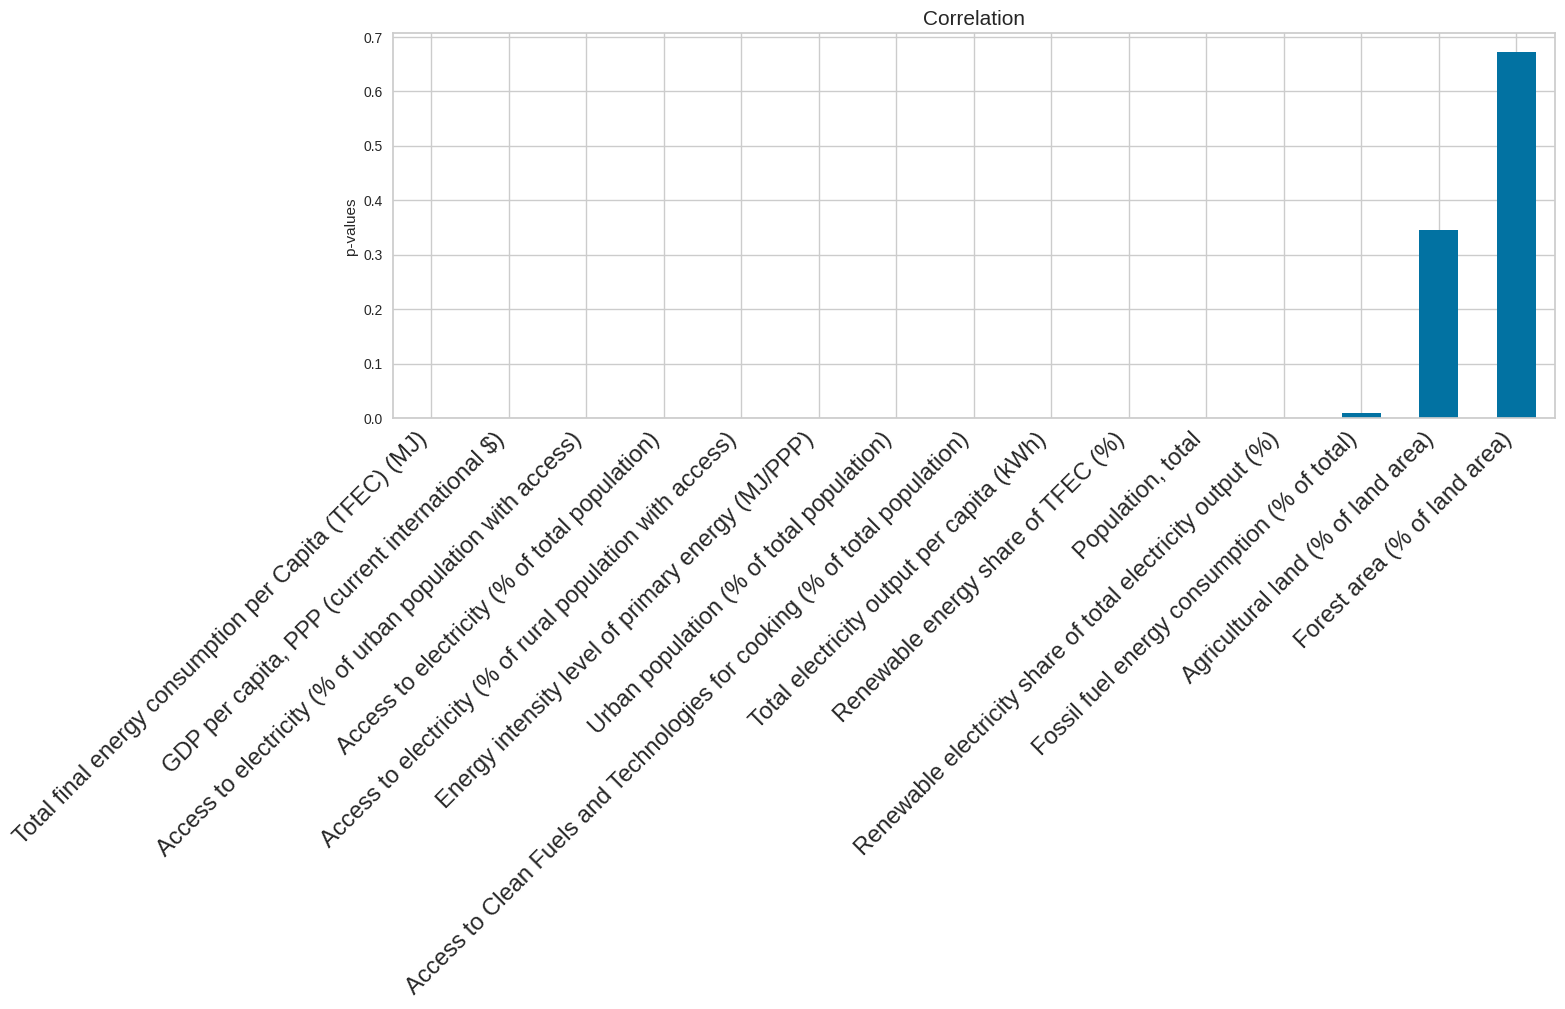

In [50]:
y_pos = np.arange(len(X_train.columns))
plt.rc("axes", titlesize=15) #fontsize of the title

univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate = univariate.sort_values(ascending=True)
univariate.plot.bar(figsize=(15, 5), rot=55)
plt.xticks(y_pos, univariate.index, rotation=45, fontsize='17', horizontalalignment='right')
plt.ylabel("p-values")
plt.title("Correlation")
plt.show()

In [51]:
sel = SelectPercentile(f_regression, percentile=30).fit(X_train, y_train)
sel.get_feature_names_out()

array(['GDP per capita, PPP (current international $)',
       'Access to electricity (% of rural population with access)',
       'Access to electricity (% of total population)',
       'Access to electricity (% of urban population with access)',
       'Total final energy consumption per Capita (TFEC) (MJ)'],
      dtype=object)

In [52]:
X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)
X_train_t = pd.DataFrame(X_train_t, columns=sel.get_feature_names_out())
X_test_t = pd.DataFrame(X_test_t, columns=sel.get_feature_names_out())

In [53]:
reg = linreg.fit(X_train_t, y_train)

print('Training Score: ', reg.score(X_train_t, y_train))
print('Testing Score: ', reg.score(X_test_t, y_test))

Training Score:  0.5290398650081647
Testing Score:  0.413288003027406


In [56]:
y_pred = reg.predict(X_test_t)
r = np.corrcoef(y_test, y_pred)
print(r)
stats.pearsonr(y_test, y_pred)

[[1.         0.64750742]
 [0.64750742 1.        ]]


PearsonRResult(statistic=0.647507422167676, pvalue=1.3292904983606864e-15)